In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import utilities as util
import datetime as dt
import whoop as wp
import levels as lv
import zero as zo
import plot as pt

# Levels Data

In [153]:
levels = lv.load_levels_data('sandbox/data/levels_scores.csv')
levels.head(2)

,Metabolic Score
2020-09-10,60.0
2020-09-11,58.0


# Zero Fasting Data

In [154]:
fasts = zo.load_zero_data('sandbox/data/fasts.csv')
fasts.head(2)

,Date,Start,End,Hours,Night Eating
0,2020-07-26,22:52,12:26,13,NaN
1,2020-07-27,21:00,11:15,14,0.0


In [155]:
fast_stats = zo.all_fasts_stats(fasts)
fast_stats.head(2)

,Fast (cumulative hours),Fast (consecutive hours),Fast Binned (consecutive hours),Fast Binned (cumulative hours),Fast
2020-07-26,1.133333,1.133333,0-12 hours,0-12 hours,No
2020-07-27,15.433333,13.566667,13-15 hours,16-18 hours,Yes


# Whoop Data

In [156]:
whoop = wp.load_whoop_data('sandbox/data/whoop.csv')
sleep = wp.sleep_metrics(whoop)

sleep.head(2)

,Strain,Recovery,Sleep Score,Sleep (hours)
2020-03-20,13.332142,63.0,79.0,7.336175
2020-03-21,16.901529,54.0,96.0,8.661017


# Combine Whoop, Levels, and Fasting Data

In [157]:
all_data = util.create_metrics_dataset(sleep, levels, fast_stats)

In [158]:
all_data.head(2)

,Date,Metabolic Score,Strain,Recovery,Sleep Score,Sleep (hours),Fast (cumulative hours),Fast (consecutive hours),Fast Binned (consecutive hours),Fast Binned (cumulative hours),Fast
0,2020-09-10,60.0,17.75,58.0,87.0,7.78,16.00,17.50,16-18 hours,16-18 hours,Yes
1,2020-09-11,58.0,5.56,63.0,69.0,6.48,12.18,16.68,16-18 hours,13-15 hours,Yes


In [173]:
sample = pd.read_csv('sample.csv', parse_dates=['Date'], index_col=0).round(2)

In [178]:
sample.Date

0     2020-08-01
1     2020-08-02
2     2020-08-03
3     2020-08-04
4     2020-08-05
         ...    
106   2020-11-15
107   2020-11-16
108   2020-11-17
109   2020-11-18
110   2020-11-19
Name: Date, Length: 111, dtype: datetime64[ns]

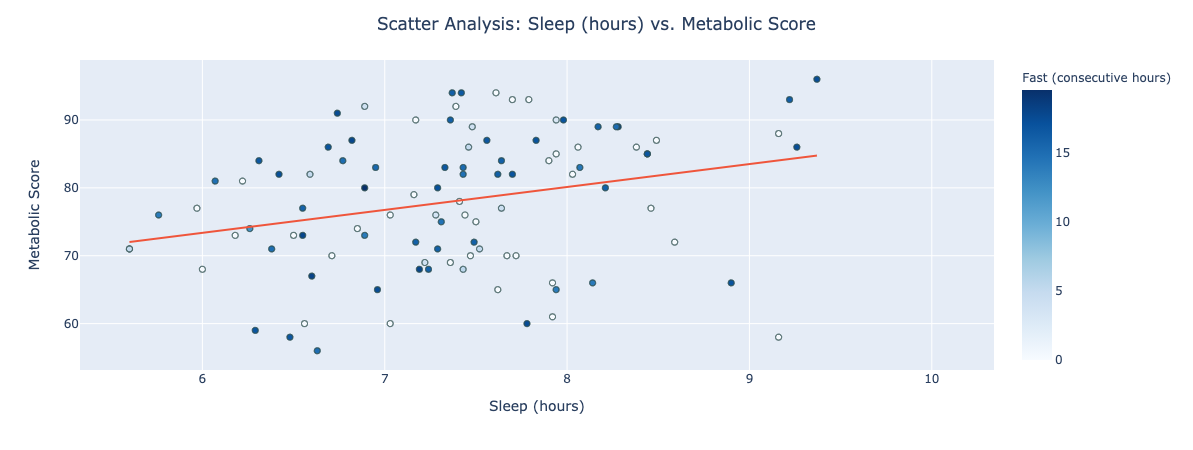

In [171]:
fig = pt.plotly_scatter(dataset=all_data, 
                        x_selection="Sleep (hours)",
                        y_selection="Metabolic Score",
                        color_selection="Fast (consecutive hours)",
                        hover=[all_data['Date']]
                       )
fig.show()

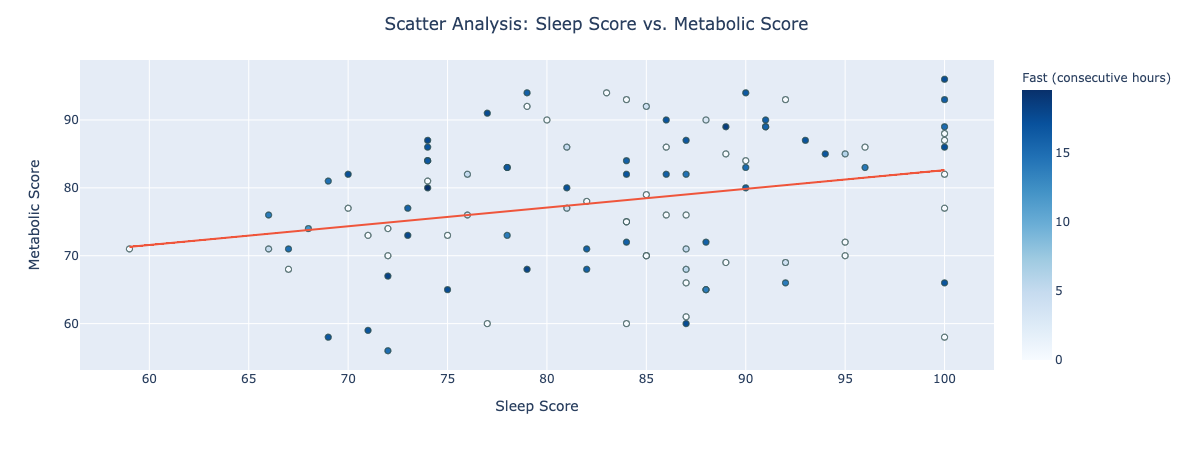

In [160]:
fig = pt.plotly_scatter(dataset=all_data, 
                        x_selection="Sleep Score",
                        y_selection="Metabolic Score",
                        color_selection="Fast (consecutive hours)",
                        hover=[all_data.index]
                       )
fig.show()

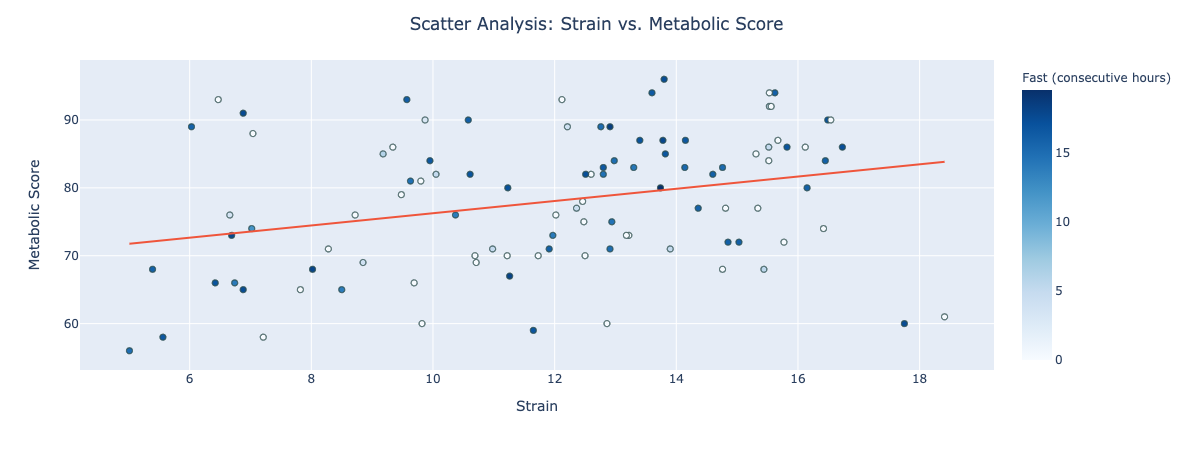

In [161]:
fig = pt.plotly_scatter(dataset=all_data, 
                        x_selection="Strain",
                        y_selection="Metabolic Score",
                        color_selection="Fast (consecutive hours)",
                        hover=[all_data.index]
                       )
fig.show()

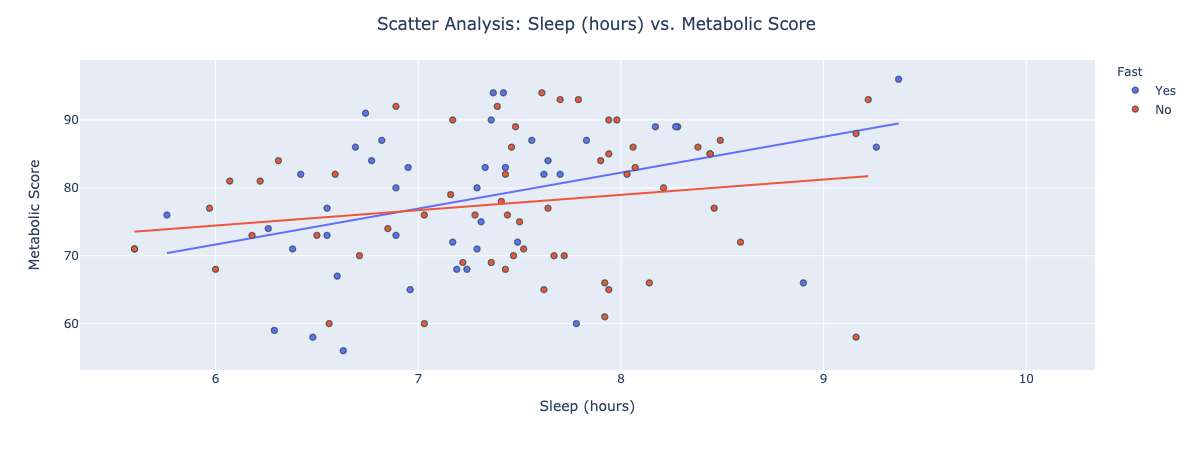

In [162]:
fig = pt.plotly_scatter(dataset=all_data, 
                        x_selection="Sleep (hours)",
                        y_selection="Metabolic Score",
                        color_selection="Fast",
                        hover=[all_data.index]
                       )
fig.show()

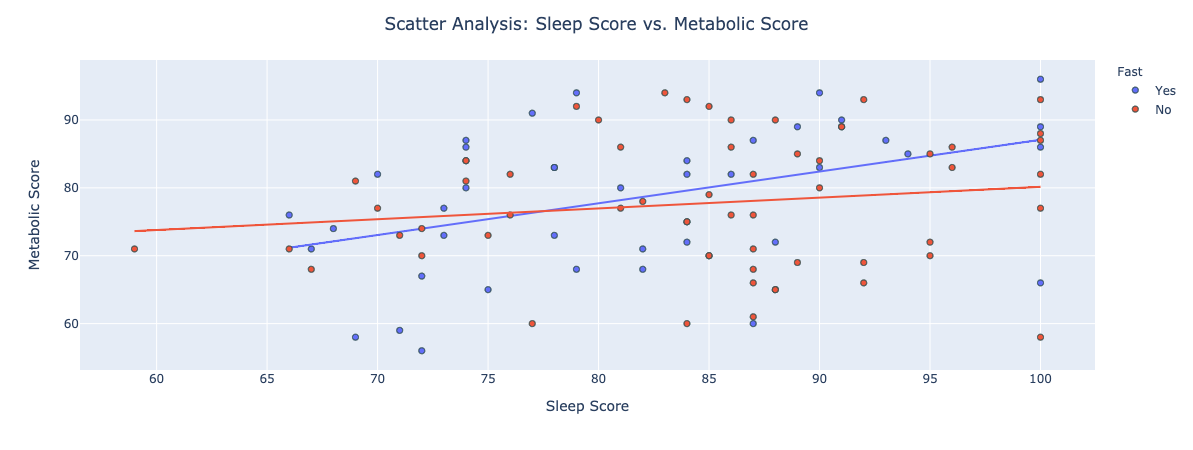

In [163]:
fig = pt.plotly_scatter(dataset=all_data, 
                        x_selection="Sleep Score",
                        y_selection="Metabolic Score",
                        color_selection="Fast",
                        hover=[all_data.index]
                       )
fig.show()

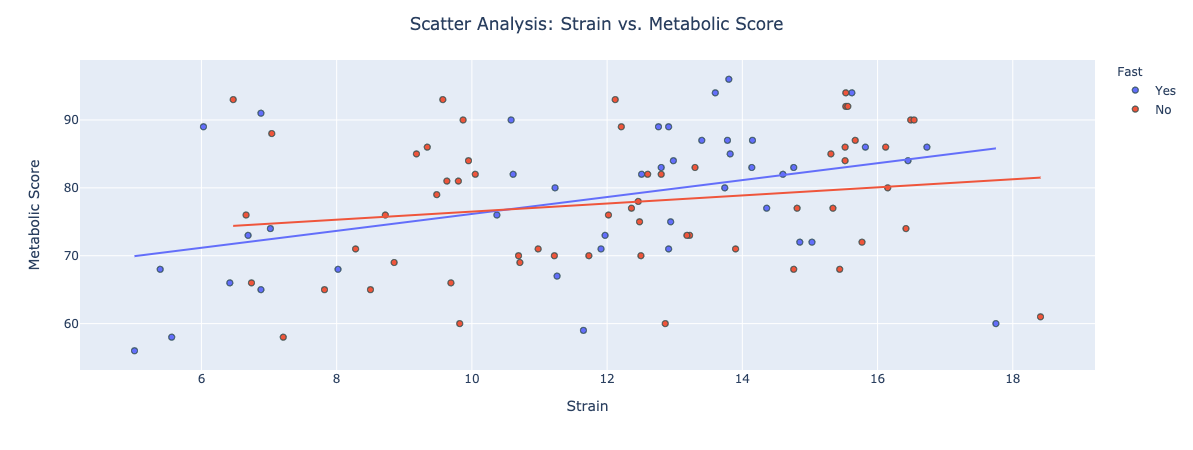

In [164]:
fig = pt.plotly_scatter(dataset=all_data, 
                        x_selection="Strain",
                        y_selection="Metabolic Score",
                        color_selection="Fast",
                        hover=[all_data.index]
                       )
fig.show()

# Remove Outliers
Most of my exteremely low Levels scores come from days where I took on a 'glucose challenge' or had some irregular behavior. I'm, mostly, a creature of habit and care more about my typical biometrics than outlier days. With that said it's relevant to look at the outliers seperately, and this is best done with the Levels 'challenges' and 'Compare Zones' features. 

In [165]:
rm_outliers = all_data.copy()

dates = ['2020-09-10', # insufficient glucose data
         '2020-09-15', # irregular behavior 
         '2020-09-21', # glucose caliberation: banana, strawberries
         '2020-09-24', # glucose caliberation: sweet potato
         '2020-09-24', # glucose challenge: sweets
         '2020-09-28', # glucose calibration: sweet potato (cold)
         '2020-09-29', # glucose challenges: sweets
         '2020-11-01', # irregular behavior
         '2020-11-02', # irregular behavior
         '2020-11-06', # irregular behavior
         '2020-11-21', # irregular behavior
         '2020-11-25', # insufficient glucose data
         '2020-11-26', # insufficient glucose data
         '2020-11-29', # insufficient glucose data
         '2020-12-14', # irregular behavior
         '2020-12-27', # insufficient glucose data
        ]
dropped_dates = util.create_dates(dates = dates)
dropped_indexes = rm_outliers[rm_outliers.Date.isin(dropped_dates)].index

# rm_outliers = rm_outliers.drop(dropped_dates)
rm_outliers = rm_outliers.drop(rm_outliers.index[dropped_indexes]).reset_index(drop=True)

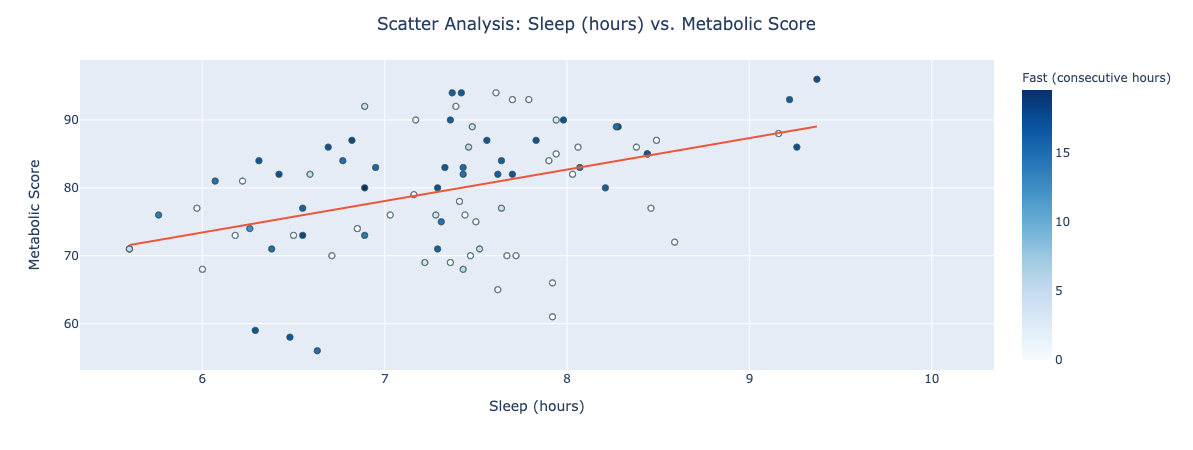

In [166]:
fig = pt.plotly_scatter(dataset=rm_outliers, 
                        x_selection="Sleep (hours)",
                        y_selection="Metabolic Score",
                        color_selection="Fast (consecutive hours)",
                        hover=[rm_outliers.index]
                       )
fig.show()

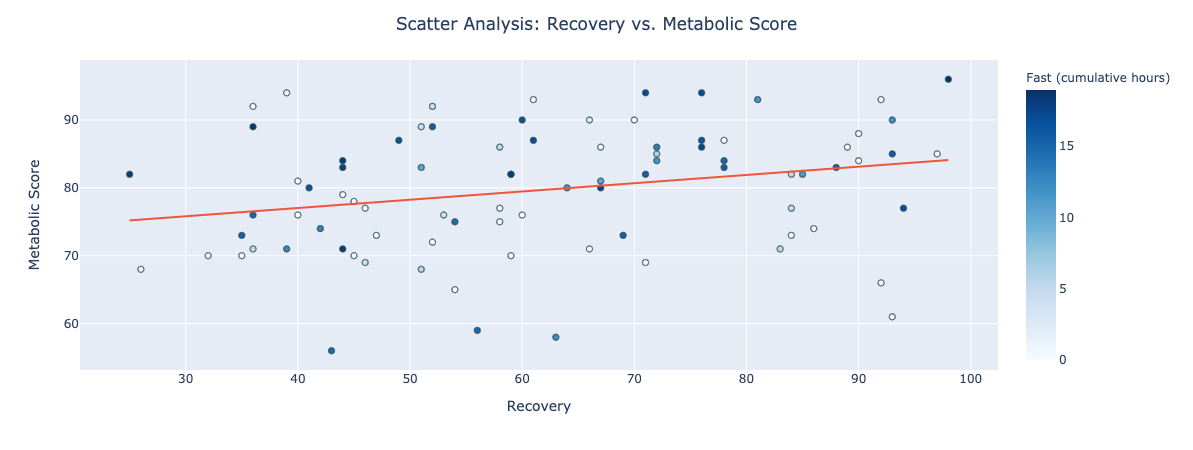

In [167]:
fig = pt.plotly_scatter(dataset=rm_outliers, 
                        x_selection="Recovery",
                        y_selection="Metabolic Score",
                        color_selection="Fast (cumulative hours)",
                        hover=[rm_outliers.index]
                       )
fig.show()

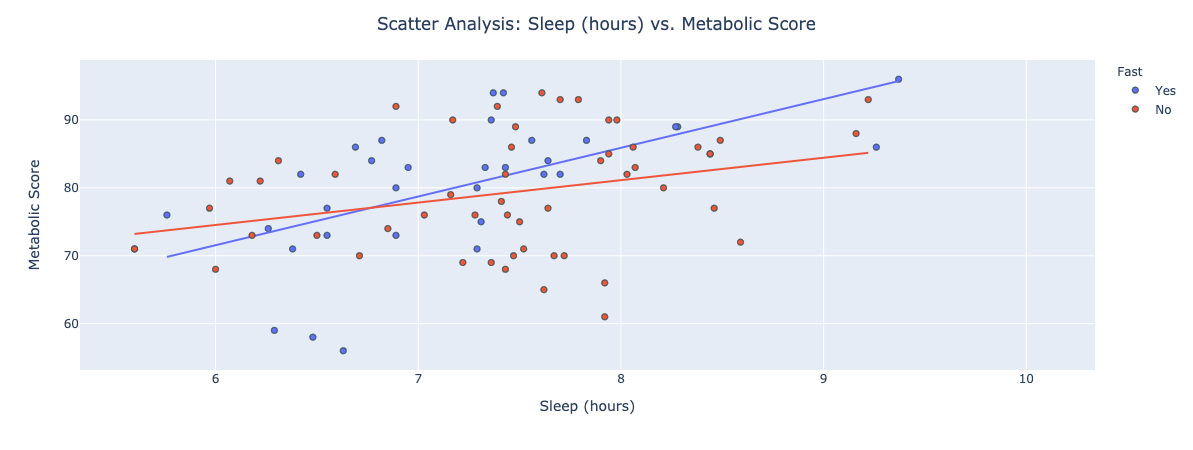

In [168]:
fig = pt.plotly_scatter(dataset=rm_outliers, 
                        x_selection="Sleep (hours)",
                        y_selection="Metabolic Score",
                        color_selection="Fast",
                        hover=[rm_outliers.index]
                       )
fig.show()

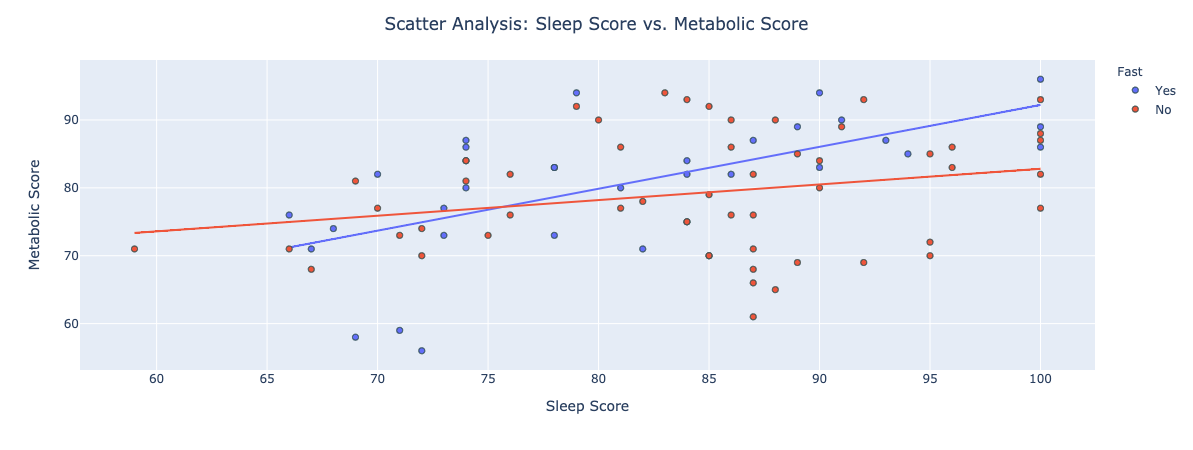

In [169]:
fig = pt.plotly_scatter(dataset=rm_outliers, 
                        x_selection="Sleep Score",
                        y_selection="Metabolic Score",
                        color_selection="Fast",
                        hover=[rm_outliers.index]
                       )
fig.show()

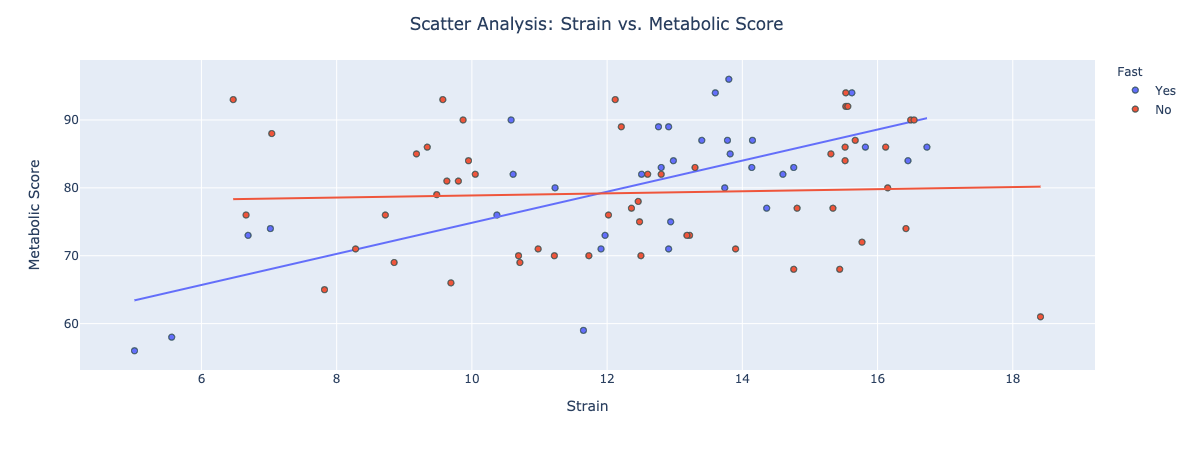

In [170]:
fig = pt.plotly_scatter(dataset=rm_outliers, 
                        x_selection="Strain",
                        y_selection="Metabolic Score",
                        color_selection="Fast",
                        hover=[rm_outliers.index]
                       )
fig.show()

# TODO: Add Confidence Intervals to Scatter Best Fit Line
https://community.plotly.com/t/adding-regression-line-and-confidence-interval-to-a-scatter-plot/37086

https://community.plotly.com/t/adding-best-fit-line-linear-regression-line-in-a-scatter-plot/6069/2

https://chart-studio.plotly.com/~empet/14628/boston-housing-regression-line-and-95-confidence-interval-for-the-regression-est/#/

https://community.plotly.com/t/adding-a-linear-regression-to-a-go-scatter-trace/40415

https://pythonplot.com/#scatter-with-regression:~:text=Scatter%20Plot%20and%20Regression%20Line%20with%2095%25%20Confidence%20Interval%20Layered,-Seaborn

- Seaborn doesn't have tooltips and interativity
- Plotly doesn't have native support of confidence intervals

Will need to create custom function: calculate statsmodel or sklearn regression, then build plotly plot

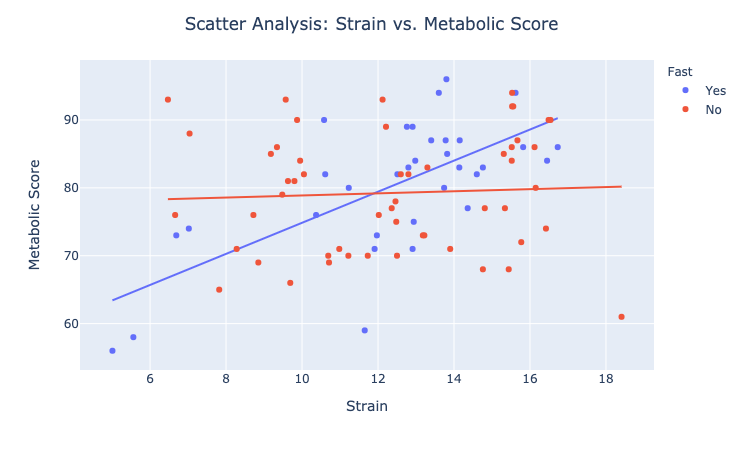

In [116]:
fig = pt.plotly_scatter(dataset=rm_outliers, 
                        x_selection="Strain",
                        y_selection="Metabolic Score",
                        color_selection="Fast",
                        hover=[rm_outliers.index]
                       )
fig.show()

In [122]:
import seaborn as sns

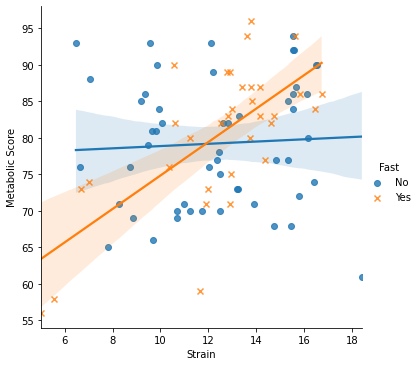

In [126]:
g = sns.lmplot(x="Strain", 
               y="Metabolic Score", 
               hue="Fast", 
               data=rm_outliers,
               markers=["o", "x"])